In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 이미지 반전 (Flip)

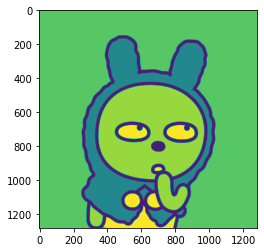

In [2]:
image = cv2.imread('./muji.png', cv2.IMREAD_GRAYSCALE)
image_flipped = cv2.flip(image, 1)  # 0 - 상하반전, 1 - 좌우반전
plt.imshow(image_flipped)

### 이미지 색상 반전

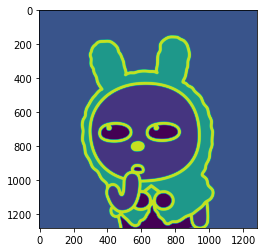

In [3]:
image_not = cv2.bitwise_not(image)
plt.imshow(image_not)

### 이미지 회전 (Rotate)

In [4]:
from PIL import Image

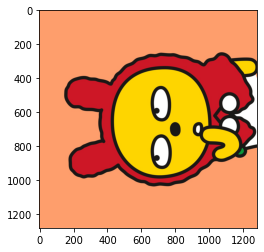

In [5]:
image = Image.open('./muji.png')
image_rotated = image.rotate(90)
plt.imshow(image_rotated)

### 이미지 흐릿하게 (Blur)

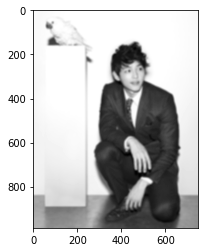

In [6]:
image = cv2.imread('./song.png', cv2.IMREAD_GRAYSCALE)
image_blurry = cv2.blur(image, (10,10)) # 커널값이 클 수록 흐릿함이 강해짐
plt.imshow(image_blurry, cmap='gray')

### Gaussian Blur

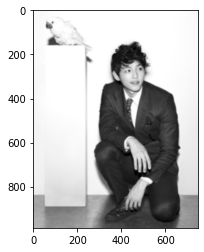

In [7]:
image_very_blurry = cv2.GaussianBlur(image, (9,9), 0)
# 정규분포, X축(너비) 방향의 표준편차, 0으로 지정하면 ((너비-1)0.5-1)0.3+0.8
plt.imshow(image_very_blurry, cmap='gray')

### 이미지 선명하게 (Sharpen)

Text(0.5, 1.0, 'Sharp Image')

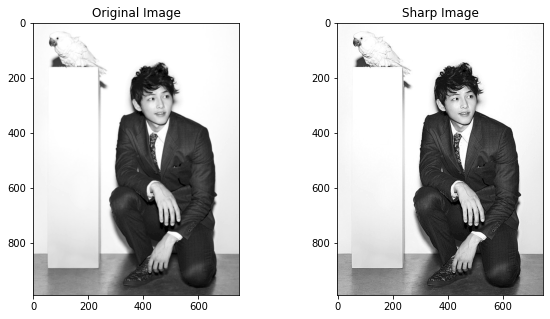

In [8]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharp = cv2.filter2D(image, -1, kernel)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_sharp, cmap='gray')
ax[1].set_title('Sharp Image')

### 이미지 대비 (Contrast) - Grayscale

Text(0.5, 1.0, 'Enhanced Image')

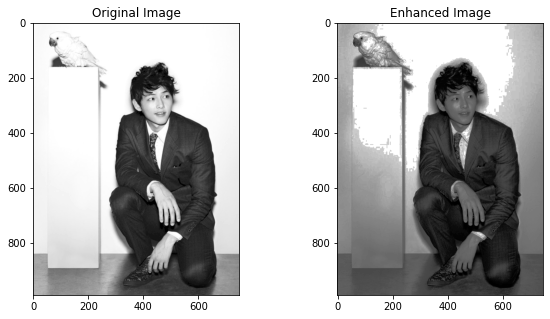

In [9]:
image_enhanced = cv2.equalizeHist(image)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_enhanced, cmap='gray')
ax[1].set_title('Enhanced Image')

### 이미지 대비 (Contrast) - Color

Text(0.5, 1.0, 'Enhanced Color Image')

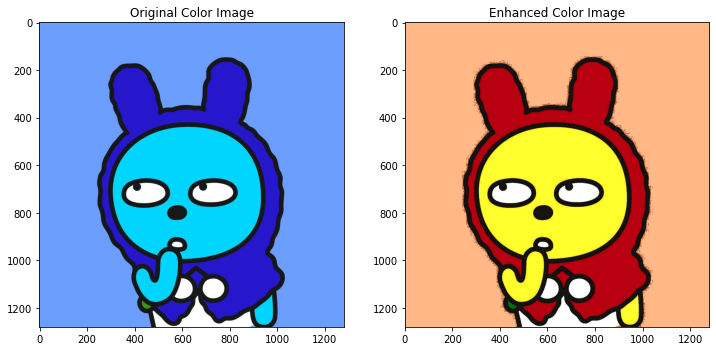

In [10]:
image_bgr = cv2.imread('./muji.png')
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

fig, ax = plt.subplots(1,2, figsize=(12, 8))
ax[0].imshow(image_bgr, cmap='gray')
ax[0].set_title('Original Color Image')
ax[1].imshow(image_rgb, cmap='gray')
ax[1].set_title('Enhanced Color Image')

### RGB 로 분리

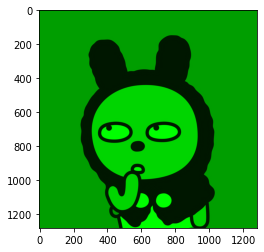

In [11]:
image_color = cv2.imread('./muji.png', cv2.IMREAD_COLOR)
b, g, r = cv2.split(image_color)
inverse = cv2.merge((np.zeros_like(b), g, np.zeros_like(r)))

image_from_array = Image.fromarray(inverse)
plt.imshow(image_from_array)

### 도형 드로잉

In [12]:
src = np.zeros((768, 1366, 3), dtype=np.uint8)

src = cv2.line(src, (100, 100), (1200, 100), (0, 0, 255), 3, cv2.LINE_AA)
src = cv2.circle(src, (300, 300), 50, (0, 255, 0), cv2.FILLED, cv2.LINE_4)
src = cv2.rectangle(src, (500, 200), (1000, 400), (255, 0, 0), 5, cv2.LINE_8)
src = cv2.ellipse(src, (1200, 300), (100, 50), 0, 90, 180, (255, 255, 0), 2)

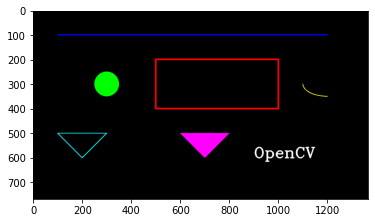

In [13]:
pts1 = np.array([[100, 500], [300, 500], [200, 600]])
pts2 = np.array([[600, 500], [800, 500], [700, 600]])
src = cv2.polylines(src, [pts1], True, (0, 255, 255), 2)
src = cv2.fillPoly(src, [pts2], (255, 0, 255), cv2.LINE_AA)

src = cv2.putText(src, "OpenCV", (900, 600), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 255, 255), 3)

image_from_array = Image.fromarray(src)
plt.imshow(image_from_array)